## Онтологическое моделирование. Социальная сеть

Теоретический материал по построению онтологии представлен в ноутбуке в папке Task_9. Into/Example ontology.ipynb


Создадим онтологию для социальной сети. 

Представим, что мы постепенно собираем данные с некоторой социальной сети и добавляем их в онтологию. После каждого изменения, мы обязательно проверяем, что все работает.

Вам не нужно собирать данные, все данные есть в папке Task_9. Onto/data:

- users.csv: пользователи соцсети.
- posts.csv: посты (контент) с заголовками.
- categories.csv: тематические классы (Fact, Opinion, FakeNews, Meme и т.д.).
- publishes.csv: кто опубликовал какой пост.


Пример онтологии: ИИ в социальных сетях

🧱 Классы:
- User — пользователь соцсети.
- Post — публикация.
- Category — базовая категория контента.
- FakeNews, Opinion, Fact, Meme, Educational — подклассы категорий.

🔗 Свойства:
- has_published(User → Post)
- has_title(Post)
- has_category(Post → Category)

🧍 Примеры пользователей:
- alice публикует clickbait_ai_news и openai_announces_gpt5
- bob публикует ai_is_dangerous, funny_ai_cat, how_neural_networks_work

📌 Категории контента:
- clickbait_ai_news — FakeNews
- ai_is_dangerous — Opinion
- openai_announces_gpt5 — Fact
- funny_ai_cat — Meme



In [28]:
# Установка необходимых библиотек
!pip install --no-cache-dir owlready2 rdflib SPARQLWrapper networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from owlready2 import *
import pandas as pd


# Загружаем данные из CSV файлов
users_df = pd.read_csv("Task_9.Onto/data/users.csv")
posts_df = pd.read_csv("Task_9.Onto/data/posts.csv")
categories_df = pd.read_csv("Task_9.Onto/data/categories.csv")
publishes_df = pd.read_csv("Task_9.Onto/data/publishes.csv")


In [30]:
# users_df

In [31]:
# posts_df 

# Итерация 1

## Задание 1: Создайте онтологию для двух классов

Для создания концептов используйте файлы: 
- posts.csv (содержит: id, title) -> класс Post
- users.csv (содержит: id, name) -> класс User

Для создания отношений используйте файл publishers.csv (содержит: user_id, post_id — кто опубликовал пост):
- объектное свойство "опубликовал" (has_published) между User и Post
- для Post свойство-значение "имеет заголовок" (has_title) строкового типа
- для User свойство-значение "имеет имя" (has_name) строкового типа

пояснение: здесь создаю базовые классы user и post и их свойства

In [32]:
onto = get_ontology("http://example.org/social_ai.owl")


In [33]:
with onto:
    class User(Thing):
        pass
    class Post(Thing):
        pass
    class has_published(User >> Post):
        pass
    class has_title(Post >> str):
        pass
    class has_name(User >> str):
        pass

## Задание 2: Создайте экземпляры пользователей
Создайте всех пользователей на основе User из набора данных users_df.

Передайте доступные свойства для экземпляров. 
пояснение: создаю экземпляры user из users_df и сохраняю имя

In [34]:
for index, row in users_df.iterrows():
    user_id = str(row['id'])
    name = str(row['name'])
    u = User(user_id)
    u.has_name.append(name)

## Задание 3: Создайте экземпляры постов
Создайте все посты на основе Post из набора данных posts_df.

Передайте доступные свойства для экземпляров. 
пояснение: создаю экземпляры post из posts_df и сохраняю заголовок

In [35]:
for index, row in posts_df.iterrows():
    post_id = str(row['id'])
    title = str(row['title'])
    p = Post(post_id)
    p.has_title.append(title)

## Задание 4: Создайте связи с помощью отношения  has_published между пользователями и постами

пояснение: связываю пользователей и посты по данным publishes_df

In [36]:
for index, row in publishes_df.iterrows():
    user_id = str(row['user_id'])
    post_id = str(row['post_id'])
    u = onto.search_one(iri = "*" + user_id)
    p = onto.search_one(iri = "*" + post_id)
    if u and p:
        u.has_published.append(p)

## Задание 5: Проверка онтологии

Проверьте все ли работает. Выведите для каждого пользователя название опубликованного  им поста. 
пояснение: печатаю публикации каждого пользователя для проверки

In [37]:
for u in onto.search(type=User):
    if u.has_published:
        print(f"User {u.name} (Name: {u.has_name}) published:")
        for p in u.has_published:
            print(f"  - {p.name} (Title: {p.has_title})")

User u1 (Name: ['Алексей', 'Алексей']) published:
  - p1 (Title: ['Новый ИИ от OpenAI способен писать музыку', 'Новый ИИ от OpenAI способен писать музыку'])
  - p1 (Title: ['Новый ИИ от OpenAI способен писать музыку', 'Новый ИИ от OpenAI способен писать музыку'])
User u2 (Name: ['Мария', 'Мария']) published:
  - p2 (Title: ['Илон Маск планирует имплантировать чипы в мозг', 'Илон Маск планирует имплантировать чипы в мозг'])
  - p2 (Title: ['Илон Маск планирует имплантировать чипы в мозг', 'Илон Маск планирует имплантировать чипы в мозг'])
User u3 (Name: ['Иван', 'Иван']) published:
  - p3 (Title: ['Почему стоит опасаться глубоких фейков', 'Почему стоит опасаться глубоких фейков'])
  - p3 (Title: ['Почему стоит опасаться глубоких фейков', 'Почему стоит опасаться глубоких фейков'])
User u4 (Name: ['Екатерина', 'Екатерина']) published:
  - p4 (Title: ['ИИ ошибся и выдал фейковую новость', 'ИИ ошибся и выдал фейковую новость'])
  - p4 (Title: ['ИИ ошибся и выдал фейковую новость', 'ИИ ошибс

# Итерация 2

## Задание 6: Добавьте новый концепт в существующую онтологию

Добавьте класс Category в уже существующую онтологию

пояснение: добавляю новый класс category для тематики постов

In [38]:
with onto:
    class Category(Thing):
        pass

## Задание 7: Добавьте свойства и связи

После добавления класса Category добавьте объектное свойство has_category для связи постов с категориями.

пояснение: добавляю свойство has_category чтобы связать post и category

In [39]:
with onto:
    class has_category(Post >> Category):
        pass

## Задание 8: Создайте экземпляры категорий 

Создайте экземпляяры категорий и реализуйте связь между постами и категориями

пояснение: создаю экземпляры category и присваиваю их постам

In [40]:
category_instances = {}
for category_name in sorted(categories_df["category"].unique()):
    category_instances[category_name] = Category(category_name)

In [41]:
for index, row in categories_df.iterrows():
    post_id = str(row["post_id"])
    category_name = str(row["category"])
    p = onto.search_one(iri="*" + post_id)
    c = category_instances.get(category_name) or onto.search_one(iri="*" + category_name)
    if p and c:
        p.has_category.append(c)

## Задание 9: Проверка онтологии

Проверьте все ли работает. Выведите для каждого пользователя название опубликованного  им поста с указанием к какой катеригории этот пост относится.
Примечание. Для каждого поста должна быть выведена только одна категория, без повторов

пояснение: вывожу посты с одной категорией на пост без повторов

In [42]:
for u in onto.search(type=User):
    printed_posts = set()
    for p in u.has_published:
        if p.name in printed_posts:
            continue
        category_name = p.has_category[0].name if p.has_category else "нет_категории"
        title = p.has_title[0] if p.has_title else ""
        print(f"{u.name}: {title} -> {category_name}")
        printed_posts.add(p.name)

u1: Новый ИИ от OpenAI способен писать музыку -> Fact
u2: Илон Маск планирует имплантировать чипы в мозг -> Fact
u3: Почему стоит опасаться глубоких фейков -> Opinion
u4: ИИ ошибся и выдал фейковую новость -> FakeNews
u5: ИИ улучшает качество фото с низким разрешением -> Fact
u6: Советы по защите личных данных в соцсетях -> Opinion
u7: Мнение: будущее за гибридным интеллектом -> Opinion
u8: Факт: ИИ уже используется в медицинской диагностике -> Fact
u9: Ироничный мем про ИИ и роботов -> Meme
u10: Новости: ИИ победил чемпиона по го -> Fact
u11: Мнение: роботы не заменят людей -> Opinion


## Задание 10: Создание аксиомы

Для данной онтологии, которая представляет посты пользователей в социальных сетях, можно добавить аксиому, которая будет утверждать, что <b>"Каждый пост, опубликованный пользователем, имеет хотя бы одну категорию"</b>. Это гарантирует, что все посты будут связаны с какой-то категорией.

Чтобы выразить это в OWL-формате, можно создать аксиому, которая будет связывать посты с категорией через свойство has_category. Также необходимо избегать повторов. 
пояснение: задаю ограничение что у каждого post есть хотя бы одна category

In [43]:
with onto:
    Post.is_a.append(has_category.some(Category))

## Задание 11: Проверка онтологии

Проверьте, что аксиома работает -> для каждого поста проверяется, что он имеет категорию и выводится название самой категории. 
пояснение: печатаю категорию для каждого post как проверку

In [44]:
for p in onto.search(type=Post):
    category_name = p.has_category[0].name if p.has_category else "нет_категории"
    title = p.has_title[0] if p.has_title else ""
    print(f"{p.name}: {title} -> {category_name}")

p1: Новый ИИ от OpenAI способен писать музыку -> Fact
p2: Илон Маск планирует имплантировать чипы в мозг -> Fact
p3: Почему стоит опасаться глубоких фейков -> Opinion
p4: ИИ ошибся и выдал фейковую новость -> FakeNews
p5: ИИ улучшает качество фото с низким разрешением -> Fact
p6: Советы по защите личных данных в соцсетях -> Opinion
p7: Мнение: будущее за гибридным интеллектом -> Opinion
p8: Факт: ИИ уже используется в медицинской диагностике -> Fact
p9: Ироничный мем про ИИ и роботов -> Meme
p10: Новости: ИИ победил чемпиона по го -> Fact
p11: Мнение: роботы не заменят людей -> Opinion


# Итерация 3

## Задание 12: Создание подкласса для FakeNews

Создайте потомка FakeNewsPost для класса Post

пояснение: создаю подкласс fakenewspost для фейковых публикаций

In [45]:
with onto:
    class FakeNewsPost(Post):
        pass

## Задание 13: Применение подкласса к постам с категорией 'FakeNews'

Если категория поста - 'FakeNews', то сделайте его экземпляром FakeNewsPost

пояснение: помечаю посты с категорией fakenews как fakenewspost

In [46]:
for p in onto.search(type=Post):
    if any(c.name == "FakeNews" for c in p.has_category):
        if FakeNewsPost not in p.is_a:
            p.is_a.append(FakeNewsPost)

## Задание 14: Проверка онтологии

Выполните проверку -  есть ли посты типа FakeNewsPost, если есть, то выведите их названия (title)

пояснение: вывожу заголовки постов типа fakenewspost

In [47]:
for p in onto.search(type=FakeNewsPost):
    title = p.has_title[0] if p.has_title else ""
    print(title)

ИИ ошибся и выдал фейковую новость


# Итерация 4

## Задание 15: Инверсивное отношение

Создайте инверсивное объектное отношение  "имеет авторство" has_author для Post и User  отношению has_published.

Примечание. Для указания, что отношение инверсивное другому отношению используйте свойство inverse_property. 

Например, 

```
with onto:
   class has_child(ObjectProperty):
        domain = [Parent]
        range = [Children]
        inverse_property = has_parent
```

пояснение: добавляю инверсное свойство has_author к has_published

In [48]:
with onto:
    class has_author(Post >> User):
        inverse_property = has_published

 ## Задание 15: Cоздайте концепт LegalCase - Судебное разбирательство

 Мы хотим выявить всех, кто "строчит" фейки.
 В онтологии это можно выразить с помощью правила, связывающего факт публикации фейковой новости с последствием — судебным разбирательством. 

 Создайте класс LegalCase.

пояснение: добавляю класс legalcase для фиксации разбирательств

In [49]:
with onto:
    class LegalCase(Thing):
        pass

 ## Задание 16: Добавим объектное свойство involved_in_case

 Добавим объектное свойство involved_in_case между классами User и LegalCase.

пояснение: связываю user с legalcase через involved_in_case

In [50]:
with onto:
    class involved_in_case(User >> LegalCase):
        pass

Примечание. Добавим правило: 

`если User публикует NewsPost с категорией FakeNews, то он участвует в LegalCase`

Чтобы указать такое правило можно использовать синтаксис SWRL правил через Imp:

```
with onto:
    rule = Imp("FakeNewsLegalImp", namespace=onto)
    rule.set_as_rule("""
        User(?u), Post(?p), hasAuthor(?p, ?u), has_category(?p, FakeNews) 
        -> involved_in_case(?u, ?case), LegalCase(?case)
    """)

```

Данное правило мы можем загрузить, однако нам необходим ризонер, который позволяет выявлять на основе заданных правил новые знания. К примеру, если пользователь опубликовал пост с категорией FakeNews, то он автоматически (при инференции) будет связан с новым инстансом LegalCase.

Правило SWRL, которое задано выше, не будет автоматически "выполняться" или выводить результаты в owlready2. Это связано с тем, что owlready2 не имеет встроенного механизма выполнения (reasoning) SWRL-правил — только их хранение и сериализация в OWL.

Чтобы правило дало видимый результат, нужно запустить ризонер, но в Simba его установить не получится (проблема с Java). 

Поэтому нужно "сэмулировать" выполнение SWRL-правил вручную в Python. 

## Задание 17: Реализуйте в ручную применение вышеописанной SWRL-логики

Реализуйте проверку для всех пользователей:

если User публикует NewsPost с категорией FakeNews, то он участвует в LegalCase (судебном разбирательстве).

пояснение: вручную применяю логику swrl для связи user и legalcase

In [51]:
for u in onto.search(type=User):
    has_fake = False
    for p in u.has_published:
        if any(c.name == "FakeNews" for c in p.has_category):
            has_fake = True
            break
    if has_fake:
        case_name = f"case_{u.name}"
        case = onto.search_one(iri="*" + case_name)
        if not case:
            case = LegalCase(case_name)
        if case not in u.involved_in_case:
            u.involved_in_case.append(case)

## Задание 18: Сохраните полученную онтологию 

 Сохраните полученную онтологию, используя метод save(). Пример, 

```
 onto.save(file="onlogy.owl", format="rdfxml")

```

Откройте файл с онтологией, изучите вид представления данных.

пояснение: сохраняю онтологию в файл для просмотра

In [52]:
onto.save(file="ontology.owl", format="rdfxml")

## Задание 19: Отнологический граф

Постройте онтологический граф для полученной онтологии. 
Важно, чтобы полученный граф был читаемый!

пояснение: строю граф связей по триплетам и показываю его

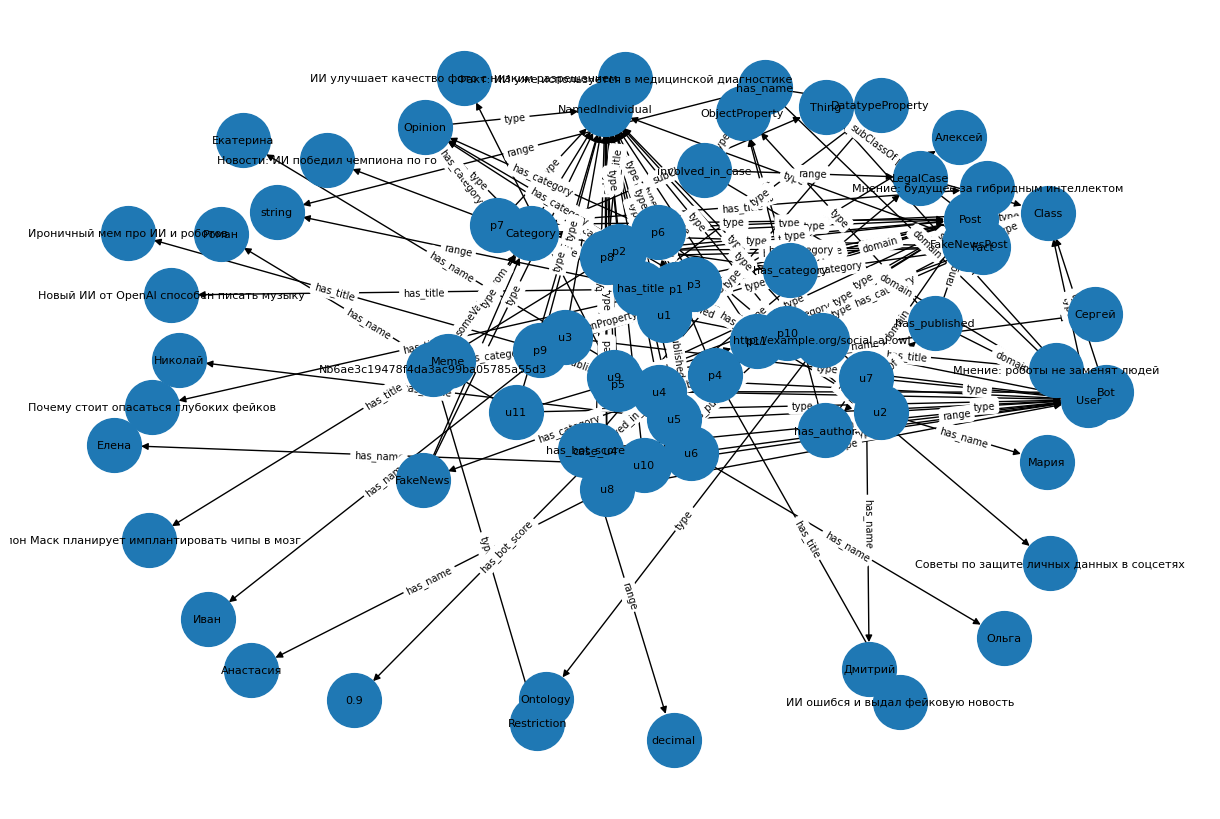

In [53]:
from rdflib import Graph
try:
    import networkx as nx
    import matplotlib.pyplot as plt
    g = Graph()
    g.parse("ontology.owl")
    G = nx.DiGraph()
    for s, p, o in g:
        s_label = s.split("#")[-1]
        p_label = p.split("#")[-1]
        o_label = o.split("#")[-1]
        if s_label and p_label and o_label:
            G.add_edge(s_label, o_label, label=p_label)
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.8)
    nx.draw(G, pos, with_labels=True, node_size=1500, font_size=8)
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    plt.axis("off")
    plt.show()
except Exception as e:
    print(e)

##  Задание 20: Итерация 5

Добавьте новую итерацию для полученной онтологии. В ней можно добавить новые классы, отношения, правила и т.д. 

Проверьте онтологию с новыми изменениями. 

пояснение: добавляю новую сущность и проверяю результат

In [54]:
with onto:
    class Bot(User):
        pass
    class has_bot_score(User >> float):
        pass
for u in onto.search(type=User):
    if u.involved_in_case:
        if Bot not in u.is_a:
            u.is_a.append(Bot)
        u.has_bot_score.append(0.9)
for u in onto.search(type=Bot):
    print(u.name, u.has_bot_score)

u4 [0.9, 0.9]
